# Цели и задачи

**Цель:** изучить модель "хищник - жертва" (модель Лотки-Вольтерры) и реализовать процесс моделирования с помощью программных средств.

**Задачи:**

* изучить теорию о модели "хищник - жертва"
* построить модель "хищник - жертва":
  * построить графики изменения численности хищников, жертв
  * построить график зависимости численности жертв и хищников
  * найти стационарное состояние данной модели

# Теоретическая справка

Простейшая модель взаимодействия двух видов типа «хищник — жертва» - модель Лотки-Вольтерры. Данная двувидовая модель основывается на следующих предположениях

1. Численность популяции жертв $x$ и хищников $y$ зависят только от времени (модель не учитывает пространственное распределение популяции на занимаемой территории)

2. В отсутствии взаимодействия численность видов изменяется по модели Мальтуса, при этом число жертв увеличивается, а число хищников падает

3. Естественная смертность жертвы и естественная рождаемость хищника считаются несущественными

4. Эффект насыщения численности обеих популяций не учитывается

5. Скорость роста численности жертв уменьшается пропорционально численности хищников

$$
\begin{cases}
    \frac{dx}{dt} = ax(t)-bx(t)y(t)\\
    \frac{dy}{dt} = -cy(t)+dx(t)y(t)
\end{cases}
$$

В этой модели $x$ – число жертв, $y$ - число хищников. Коэффициент $a$ описывает скорость естественного прироста числа жертв в отсутствие хищников, $с$ - естественное вымирание хищников, лишенных пищи в виде жертв. Вероятность взаимодействия жертвы и хищника считается пропорциональной как количеству жертв, так и числу самих хищников ($xy$). Каждый акт взаимодействия уменьшает популяцию жертв, но способствует увеличению популяции хищников (члены $-bxy$ и $dxy$ в правой части уравнения). 

# Программная реализация

## Подготовка к моделировнию

Все данные соответствуют варианту 14 = $(1032186063\mod{70}) + 1$.

**Инициализация библиотек**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Начальные данные и необходимые функции**

Введём соответствующие нашему варианту начальные данные для построения модели:

In [10]:
a = 0.77
b = 0.077
c = 0.33
d = 0.033

v0 = [4, 9] # x0, y0
t = np.arange(0, 400, 0.1)

Создадим функцию для нашей СДУ:

In [11]:
def syst(x, t):
    dx1 = -a*x[0] + b*x[0]*x[1]
    dx2 = c*x[1] - d*x[0]*x[1]
    return [dx1, dx2]

Воспользуемся функцией `odeint` из модуля `scipy.integrate` и решим нашу СДУ, после чего выделим значения популяции жертв (`y1`) и хищников (`y2`)

In [12]:
y = odeint(syst, v0, t)
y1 = y[:, 0] # значения популяции жертв
y2 = y[:, 1] # значения популяции хищников

## Построение графиков для модели

### Графики численности хищников, жертв

С помощью модуля `matplotlib.pyplot` построим графики изменения численности хищников и жертв.

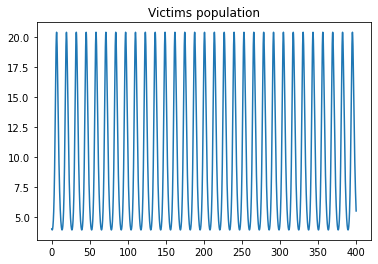

In [13]:
plt.title('Victims population')
plt.plot(t, y1)

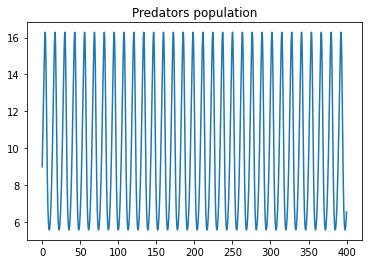

In [14]:
plt.title('Predators population')
plt.plot(t, y2)

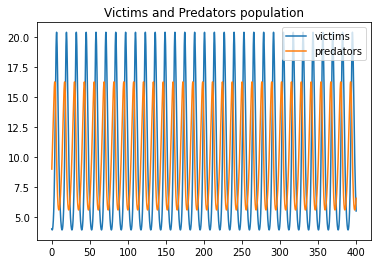

In [15]:
plt.title('Victims and Predators population')
plt.plot(t, y1, label='victims')
plt.plot(t, y2, label='predators')
plt.legend(loc='upper right')

### График зависимости численности хищников от численности жертв

На следующем этапе нам необходимо вычислить точку стационарного состояния системы $\left(x_0 = \frac{c}{d}, y_o = \frac{a}{b}\right)$. После её нахождения - построим график зависимости численности хищников от численности жертв.

Точка стационарного значения: (10.0, 10.0)


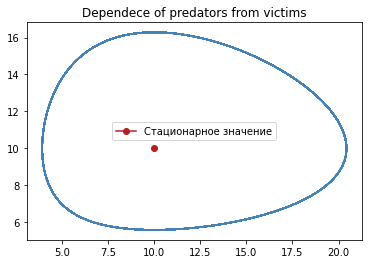

In [16]:
x0 = c/d
y0 = a/b

plt.title('Dependece of predators from victims')
plt.plot(y1, y2, 'steelblue')
plt.plot(x0, y0, color='firebrick', marker='o', label='Стационарное значение')
plt.legend()

print('Точка стационарного значения: ('+ str(x0)+', '+ str(y0)+ ')')

# Выводы

Была успешно изучена теорию о модели "хищник - жертва", после чего были грамотно реализованы графики изменения популяции хищников и жертв, график зависимости количества хищников от жертв и была найдена точка стационарного состояния системы. Реализация делалась на языке Python.